# Transformada Discreta Wavelet

Diseño del banco de filtros


In [1]:
import pywt  # Libreria de wavelets

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


### rbio1.3

Tomaremos como ejemplo para el diseño de los filtros la rbio1.3

Referencia [Link](http://wavelets.pybytes.com/wavelet/rbio1.3/)


Text(0.5, 1.0, '$\\Psi(t)$ Reconstruction')

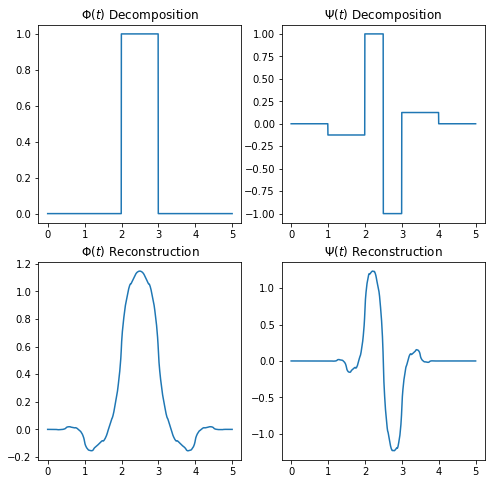

In [2]:
# mostrar la funcion rbio1.3

wrb = pywt.Wavelet('rbio1.3')
(phiR1, psiR1, phiR2, psiR2, x) = wrb.wavefun()


plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(x, phiR1)
plt.title('$\Phi(t)$ Decomposition')
plt.subplot(2, 2, 2)
plt.plot(x, psiR1)
plt.title('$\Psi(t)$ Decomposition')
plt.subplot(2, 2, 3)
plt.plot(x, phiR2)
plt.title('$\Phi(t)$ Reconstruction')
plt.subplot(2, 2, 4)
plt.plot(x, psiR2)
plt.title('$\Psi(t)$ Reconstruction')


### Respuesta al impulso

Proceso de cálculo de la respuesta al impulso de los filtros a partir de Wavelet Madre


En primer lugar, hay que tener en cuenta la definición de producto interno entre dos funciones

$\langle g(u), f(u) \rangle = \int_{-\infty}^{+\infty}{g(u)f(u)du}$

Y existe una función de escalamiento para la Wavelet $\Phi(x)$ la cual podemos dilatar, la dilatacion esta dada por:

$\Phi_{2j}(x) = 2^j\Phi(2^j x)$

Ahora, los filtros están dados como una función $H$, los cuales tienen una respuesta al impulso dada por

$h(n) = \langle \Phi_{2^{-1}}(u), \Phi(u-n) \rangle$

donde $n$ debe ser entero

de acuerdo con esto:

$h(n) = \frac{1}{2}\int_{-\infty}^{+\infty}{\Phi(\frac{u}{2})\Phi(u-n)du}$


In [3]:
# calculo de las respuestas al impulso
# desde h0 hasta h5

def impulseResponse(f_u, x_val, n=6, process=False):
    h_u_ = []
    # dilation of the function by 2  f(u/2)
    g_u = signal.resample(f_u, 2*len(f_u), window='hamming')

    if process:
        plt.figure(figsize=(12, 8))

    for i in range(0, n):

        # se dobla el tamaño del vector
        f_u_l = np.concatenate((f_u, np.zeros(f_u.shape)))
        # se agregan 5 segundos a la funcion
        x_val_l = np.concatenate((x_val, x_val+5))

        f_u_l = np.roll(f_u_l, i*256)  # roll the vector 1 sec
        h_u = f_u_l*g_u

        h_u_.append((1/2)*np.trapz(h_u, x_val_l))

        if process:
            plt.subplot(2, 3, i+1)
            plt.plot(x_val_l, f_u_l)
            plt.plot(x_val_l, g_u)
            plt.stem(x_val_l, h_u)

    return np.array(h_u_)


H(u) reconst =  [-0.07658614  0.05082696  0.52799913  0.52403066  0.04644832 -0.07617985]
G(u) reconst =  [ 0.00041649 -0.06535513  0.06890075  0.05618051 -0.05976539 -0.00037813]
H(u) decompo =  [ 3.99002996e-08  3.03812314e-03  4.99891305e-01  4.96961909e-01
  1.08663072e-04 -3.93651450e-08]
G(u) decompo =  [-0.00732421  0.06611833 -0.0487069  -0.05712797  0.06968816 -0.00741576]


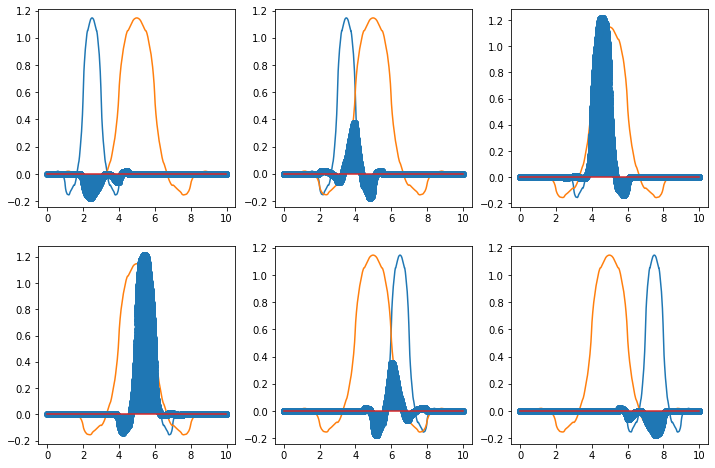

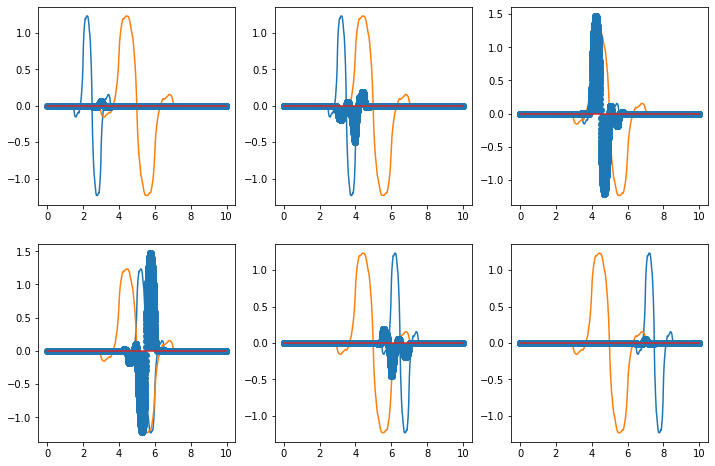

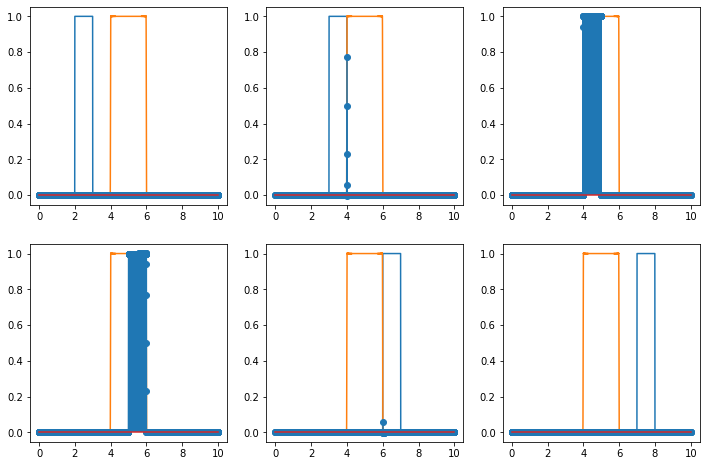

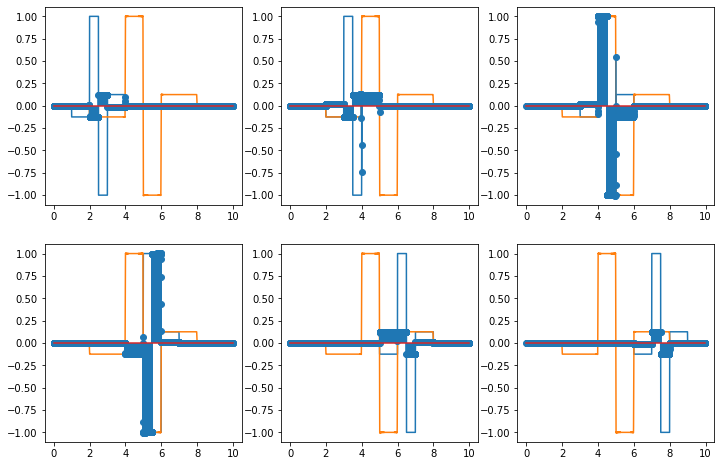

In [4]:

h_u_r = impulseResponse(phiR2, x, process=True)
g_u_r = impulseResponse(psiR2, x, process=True)
h_u_d = impulseResponse(phiR1, x, process=True)
g_u_d = impulseResponse(psiR1, x, process=True)

print("H(u) reconst = ", h_u_r)
print("G(u) reconst = ", g_u_r)
print("H(u) decompo = ", h_u_d)
print("G(u) decompo = ", g_u_d)


## Calculo de los ceficientes de los filtros

Estas son solo las respuestas al impulso, es necesario calcular los filtros en cuadratura de espejo (quadrature mirror filters - qmf)


In [5]:
# Obtencion de los filtros de la libreria para comparar
wname = 'rbio1.3'

wrb = pywt.Wavelet('rbio1.3')
(phi1, psi1, phi2, psi2, x) = wrb.wavefun()
# Obtencion de los filtros a partir de la libreria
(LoD, HiD, LoR, HiR) = wrb.filter_bank
fx = np.arange(0, len(LoD), 1)

# se utilizan los filtrso H de descomposicion y de reconstruccion
filtR = impulseResponse(phi2, x)  # filtro de reconstruccion
filtD = impulseResponse(phi1, x)  # filtro de descomposicion


### Calculo de filtros cuadratura de espejo

Para obtener los filtros en cuadratura de espejo (quadrature mirror filters), se sigue el siguiente procedimiento.


In [6]:
LoR_1 = (2**(1/2))*filtD.copy()
HiR_1 = np.flip(LoR_1.copy())
HiR_1[1::2] *= -1
HiD_1 = np.flip(HiR_1.copy())
LoD_1 = np.flip(LoR_1.copy())


## Comparacion de los filtros


Text(0.5, 1.0, 'Highpass Synthesis Filter Built')

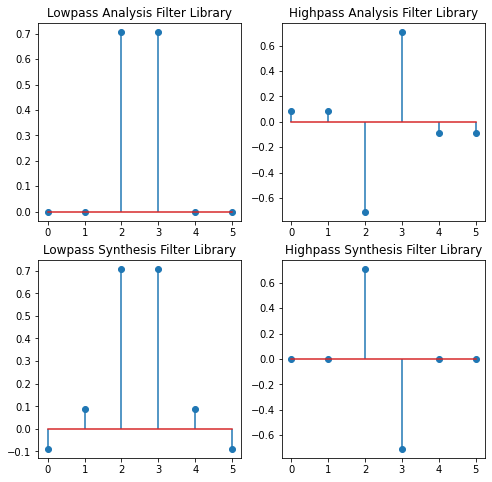

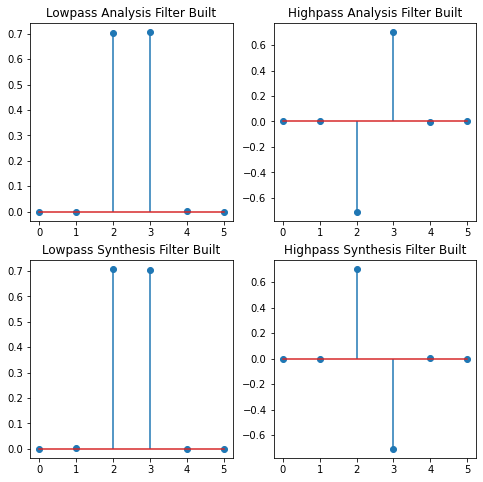

In [7]:
plt.figure(figsize=(8, 8))


plt.subplot(2, 2, 1)
plt.stem(LoD)
plt.title("Lowpass Analysis Filter Library")
plt.subplot(2, 2, 2)
plt.stem(HiD)
plt.title("Highpass Analysis Filter Library")
plt.subplot(2, 2, 3)
plt.stem(LoR)
plt.title("Lowpass Synthesis Filter Library")
plt.subplot(2, 2, 4)
plt.stem(HiR)
plt.title("Highpass Synthesis Filter Library")


plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.stem(LoD_1)
plt.title("Lowpass Analysis Filter Built")
plt.subplot(2, 2, 2)
plt.stem(HiD_1)
plt.title("Highpass Analysis Filter Built")
plt.subplot(2, 2, 3)
plt.stem(LoR_1)
plt.title("Lowpass Synthesis Filter Built")
plt.subplot(2, 2, 4)
plt.stem(HiR_1)
plt.title("Highpass Synthesis Filter Built")
